<a href="https://colab.research.google.com/github/TiagoBruno00/Economia_en_Sympy/blob/main/Brainard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Brainard
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Símbolos
y_var = sp.Symbol('Y', real=True)
y_obj = sp.Symbol('Y^*', real=True)
y = sp.Symbol('\overline{Y}', real=True)
u = sp.Symbol('\overline{μ}', real=True)
a = sp.Symbol('\overline{α}', real=True)
s_y = sp.Symbol('σ_y^2', real=True, positive=True)
s_u = sp.Symbol('σ_μ^2', real=True, positive=True)
s_a = sp.Symbol('σ_α^2', real=True, positive=True)
P = sp.Symbol('P')
ro = sp.Symbol('ρ')

In [ ]:
# Ecuaciones
Eq1 = sp.Eq(y, u + a * P)
Eq2 = sp.Eq(s_y, s_u + s_a * P**2 + 2*sp.sqrt(s_a)*sp.sqrt(s_u)*ro*P)

In [ ]:
# Optimización
EU = -(s_y + (y - y_obj)**2)
f_y = sp.solve(Eq1, y, dict=True)[0][y]
f_s_y = sp.solve(Eq2, s_y, dict=True)[0][s_y]
EU_P = EU.subs({s_y: f_s_y, y: f_y})
CPO_EU_P = sp.Eq(sp.diff(EU_P, P), 0)
P_opt = sp.solve(CPO_EU_P, P, dict=True)[0][P]
P_opt

(Y^**\overline{α} - \overline{α}*\overline{μ} - ρ*sqrt(σ_α^2)*sqrt(σ_μ^2))/(\overline{α}**2 + σ_α^2)

In [ ]:
# Valores
s_u_val = 36
s_a_val = 9
ro_val = 0.8
a_val = 4
u_val = 24
y_obj_val = 40

# Valores para s_y
s_y_val = np.linspace(0, 200, 1000000)

# PF óptima
P_opt_f = sp.lambdify((y_obj, s_u, s_a, ro, a, u), P_opt)
P_opt_val = P_opt_f(y_obj_val, s_u_val, s_a_val, ro_val, a_val, u_val)
P_opt_val

1.9839999999999998

In [ ]:
# Esperanza de y
y_opt_f = sp.lambdify((a, P, u), f_y)
y_opt_val = y_opt_f(a_val, P_opt_val, u_val)
y_opt_val

31.936

In [ ]:
# Varianza de Y
s_y_opt_f = sp.lambdify((P, s_a, s_u, ro), f_s_y)
s_y_opt_val = s_y_opt_f(P_opt_val, s_a_val, s_u_val, ro_val)
s_y_opt_val

128.56550399999998

In [ ]:
# Restricción s_y, P
P_y_u = sp.solve(Eq1, P, dict=True)[0][P]
s_y_y = sp.solve(Eq2.subs(P, P_y_u), s_y, dict=True)[0][s_y]
s_y_y

(\overline{α}**2*σ_μ^2 + 2*\overline{α}*ρ*sqrt(σ_α^2)*sqrt(σ_μ^2)*(\overline{Y} - \overline{μ}) + σ_α^2*(\overline{Y} - \overline{μ})**2)/\overline{α}**2

In [ ]:
# Eje de simetría (-B/2A)
Eje =  -ro_val*(s_u_val)**(1/2)/((s_a_val)**(1/2))
Eje # P que hace mínima la varianza

-1.6000000000000003

In [ ]:
# Varianza mínima
Restrición = s_u + s_a * P**2 + 2*sp.sqrt(s_a)*sp.sqrt(s_u)*ro*P
R_f = sp.lambdify((P, s_a, s_u, ro), Restrición)
s_m = R_f(Eje, s_a_val, s_u_val, ro_val)
s_m

12.959999999999997

In [ ]:
# Y P = Eje
Y_eje = a_val*Eje + u_val
Y_eje

17.599999999999998

In [ ]:
# Situación inicial P=0
Y_inicial = u_val
s_inicial = s_u_val

In [ ]:
# Valor de U
EU_P_opt = sp.lambdify((P, s_a, ro, s_u, a, y_obj, u), EU_P)
EU_opt_val = EU_P_opt(P_opt_val, s_a_val, ro_val, s_u_val, a_val, y_obj_val, u_val)
EU_opt_val

# Curva de Nivel óptima
C = sp.Eq(EU, EU_opt_val)
C1 = C.subs(y_obj, y_obj_val)
C2 = sp.solve(C1, y, dict=True)

C_f_y_s = sp.lambdify((s_y, s_u, s_a, ro, a, u), C2[1][y])

# Valores de y
f_y_s_val_list_2 = []
for i in range(len(s_y_val)):
    f_y_s_val = C_f_y_s(s_y_val[i], s_u_val, s_a_val, ro_val, a_val, u_val)
    f_y_s_val_list_2.append(f_y_s_val)

<lambdifygenerated-78>:2: RuntimeWarning: invalid value encountered in sqrt
  return 13.9137917190103*sqrt(1 - 0.00516546001520711*Dummy_393) + 40.0


In [ ]:
C_f_y_s_0 = sp.lambdify((s_y, s_u, s_a, ro, a, u), C2[0][y])

# Valores de y
f_y_s_val_list_3 = []
for i in range(len(s_y_val)):
    f_y_s_val = C_f_y_s_0(s_y_val[i], s_u_val, s_a_val, ro_val, a_val, u_val)
    f_y_s_val_list_3.append(f_y_s_val)

<lambdifygenerated-79>:2: RuntimeWarning: invalid value encountered in sqrt
  return 40.0 - 13.9137917190103*sqrt(1 - 0.00516546001520711*Dummy_398)


In [ ]:
# EY(s_y)
y_s = sp.solve(Eq2.subs(P, P_y_u), y, dict=True)
y_s

[{\overline{Y}: (-\overline{α}*ρ*sqrt(σ_μ^2) - \overline{α}*sqrt(ρ**2*σ_μ^2 + σ_y^2 - σ_μ^2) + \overline{μ}*sqrt(σ_α^2))/sqrt(σ_α^2)},
 {\overline{Y}: (-\overline{α}*ρ*sqrt(σ_μ^2) + \overline{α}*sqrt(ρ**2*σ_μ^2 + σ_y^2 - σ_μ^2) + \overline{μ}*sqrt(σ_α^2))/sqrt(σ_α^2)}]

In [ ]:
f_y_s = sp.lambdify((s_y, s_u, s_a, ro, a, u), y_s[0][y])

# Valores de y
f_y_s_val_list = []
for i in range(len(s_y_val)):
    f_y_s_val = f_y_s(s_y_val[i], s_u_val, s_a_val, ro_val, a_val, u_val)
    f_y_s_val_list.append(f_y_s_val)

<lambdifygenerated-80>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-sqrt(Dummy_402)*Dummy_406*ρ + sqrt(Dummy_403)*Dummy_405 - Dummy_406*sqrt(Dummy_402*ρ**2 - Dummy_402 + Dummy_404))/sqrt(Dummy_403)


In [ ]:
f_y_s_1 = sp.lambdify((s_y, s_u, s_a, ro, a, u), y_s[1][y])

# Valores de y
f_y_s_val_list_1 = []
for i in range(len(s_y_val)):
    f_y_s_val = f_y_s_1(s_y_val[i], s_u_val, s_a_val, ro_val, a_val, u_val)
    f_y_s_val_list_1.append(f_y_s_val)

<lambdifygenerated-81>:2: RuntimeWarning: invalid value encountered in sqrt
  return (-sqrt(Dummy_407)*Dummy_411*ρ + sqrt(Dummy_408)*Dummy_410 + Dummy_411*sqrt(Dummy_407*ρ**2 - Dummy_407 + Dummy_409))/sqrt(Dummy_408)


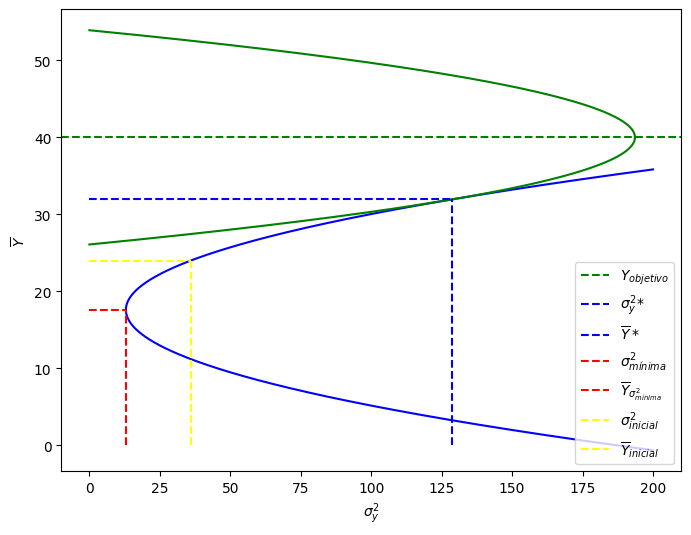

In [ ]:
# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(s_y_val, f_y_s_val_list, color='blue')
plt.plot(s_y_val, f_y_s_val_list_1, color='blue')
plt.plot(s_y_val, f_y_s_val_list_2, color='green')
plt.plot(s_y_val, f_y_s_val_list_3, color='green')
plt.axhline(y_obj_val, color='green', linestyle='--', label=r'$Y_{objetivo}$')
plt.vlines(s_y_opt_val, ymin=0, ymax=y_opt_val, color='blue', linestyle='--', label=r'$σ_y^2$*')
plt.hlines(y_opt_val, xmin=0, xmax=s_y_opt_val, color='blue', linestyle='--', label=r'$\overline{Y}*$')
plt.vlines(s_m, ymin=0, ymax=Y_eje, color='r', linestyle='--', label=r'$σ^2_{mínima}$')
plt.hlines(Y_eje, xmin=0, xmax=s_m, color='r', linestyle='--', label=r'$\overline{Y}_{σ^2_{mínima}}$')
plt.vlines(s_inicial, ymin=0, ymax=Y_inicial, color='yellow', linestyle='--', label=r'$σ^2_{inicial}$')
plt.hlines(Y_inicial, xmin=0, xmax=s_inicial, color='yellow', linestyle='--', label=r'$\overline{Y}_{inicial}$')
#plt.xlim(0, 200)
#plt.ylim(0, 40)
plt.xlabel(r'$σ_y^2$')
plt.ylabel(r'$\overline{Y}$')
plt.legend()
plt.show()